In [1]:
!pip3 install tensorflow_hub tensorflow scikit-learn pillow numpy

In [2]:
from PIL import Image
import json
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
import tensorflow_hub as tf_hub
import tensorflow as tf
from image_augment import ImageAugment

In [3]:
# Augment Images
#ImageAugment.execute("data", ["fliph","noise_0.05","noise_0.10","trans_20_20","blur_2.0","blur_4.0"])

In [4]:
# Load and split image data
def crop_center(pil_img, crop_width, crop_height):
    img_width, img_height = pil_img.size
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

def preprocess_image(img_path):
    img = Image.open(img_path)
    w, h = img.size
    img = crop_center(img, min(w,h), min(w,h))
    img = img.resize((300, 300))    
    img = np.asarray(img)/256.0    
    return img

In [5]:
if False:
    taco_data_path = 'data/TACO/data'
    taco_image_folders = os.listdir(taco_data_path)
    images = []
    flag = True
    count = 1000
    for folder in taco_image_folders:
        if "batch" in folder and count > 0:
            print(f"Loading TACO folder {folder}...")
            for img in os.listdir(f"{taco_data_path}/{folder}"):
                if count > 0:
                    # Load image
                    I = preprocess_image(f"{taco_data_path}/{folder}/{img}")

                    # Show image
                    if flag:
                        fig,ax = plt.subplots(1)
                        plt.axis('off')
                        plt.imshow(I)
                        flag = False

                    if I.shape == (300, 300, 3):
                        images.append(I)
                        count = count - 1
                    else:
                        print(f"Not adding {img} due to improper shape... Count={count}")
    taco_img_count = len(images)
    print(f"Taco Image Count: {taco_img_count}")

Loading TrashNet folder cardboard...
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class '

About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard - Type=<class 'str'>
About to add folder=cardboard -

About to add folder=glass - Type=<class 'str'>
About to add folder=glass - Type=<class 'str'>
About to add folder=glass - Type=<class 'str'>
About to add folder=glass - Type=<class 'str'>
About to add folder=glass - Type=<class 'str'>
About to add folder=glass - Type=<class 'str'>
About to add folder=glass - Type=<class 'str'>
About to add folder=glass - Type=<class 'str'>
About to add folder=glass - Type=<class 'str'>
About to add folder=glass - Type=<class 'str'>
About to add folder=glass - Type=<class 'str'>
About to add folder=glass - Type=<class 'str'>
About to add folder=glass - Type=<class 'str'>
About to add folder=glass - Type=<class 'str'>
About to add folder=glass - Type=<class 'str'>
About to add folder=glass - Type=<class 'str'>
About to add folder=glass - Type=<class 'str'>
About to add folder=glass - Type=<class 'str'>
About to add folder=glass - Type=<class 'str'>
About to add folder=glass - Type=<class 'str'>
About to add folder=glass - Type=<class 'str'>
About to add 

About to add folder=metal - Type=<class 'str'>
About to add folder=metal - Type=<class 'str'>
About to add folder=metal - Type=<class 'str'>
About to add folder=metal - Type=<class 'str'>
About to add folder=metal - Type=<class 'str'>
About to add folder=metal - Type=<class 'str'>
About to add folder=metal - Type=<class 'str'>
About to add folder=metal - Type=<class 'str'>
About to add folder=metal - Type=<class 'str'>
About to add folder=metal - Type=<class 'str'>
About to add folder=metal - Type=<class 'str'>
About to add folder=metal - Type=<class 'str'>
About to add folder=metal - Type=<class 'str'>
About to add folder=metal - Type=<class 'str'>
About to add folder=metal - Type=<class 'str'>
About to add folder=metal - Type=<class 'str'>
About to add folder=metal - Type=<class 'str'>
About to add folder=metal - Type=<class 'str'>
About to add folder=metal - Type=<class 'str'>
About to add folder=metal - Type=<class 'str'>
About to add folder=metal - Type=<class 'str'>
About to add 

About to add folder=paper - Type=<class 'str'>
About to add folder=paper - Type=<class 'str'>
About to add folder=paper - Type=<class 'str'>
About to add folder=paper - Type=<class 'str'>
About to add folder=paper - Type=<class 'str'>
About to add folder=paper - Type=<class 'str'>
About to add folder=paper - Type=<class 'str'>
About to add folder=paper - Type=<class 'str'>
About to add folder=paper - Type=<class 'str'>
About to add folder=paper - Type=<class 'str'>
About to add folder=paper - Type=<class 'str'>
About to add folder=paper - Type=<class 'str'>
About to add folder=paper - Type=<class 'str'>
About to add folder=paper - Type=<class 'str'>
About to add folder=paper - Type=<class 'str'>
About to add folder=paper - Type=<class 'str'>
About to add folder=paper - Type=<class 'str'>
About to add folder=paper - Type=<class 'str'>
About to add folder=paper - Type=<class 'str'>
About to add folder=paper - Type=<class 'str'>
About to add folder=paper - Type=<class 'str'>
About to add 

About to add folder=plastic - Type=<class 'str'>
About to add folder=plastic - Type=<class 'str'>
About to add folder=plastic - Type=<class 'str'>
About to add folder=plastic - Type=<class 'str'>
About to add folder=plastic - Type=<class 'str'>
About to add folder=plastic - Type=<class 'str'>
About to add folder=plastic - Type=<class 'str'>
About to add folder=plastic - Type=<class 'str'>
About to add folder=plastic - Type=<class 'str'>
About to add folder=plastic - Type=<class 'str'>
About to add folder=plastic - Type=<class 'str'>
About to add folder=plastic - Type=<class 'str'>
About to add folder=plastic - Type=<class 'str'>
About to add folder=plastic - Type=<class 'str'>
About to add folder=plastic - Type=<class 'str'>
About to add folder=plastic - Type=<class 'str'>
About to add folder=plastic - Type=<class 'str'>
About to add folder=plastic - Type=<class 'str'>
About to add folder=plastic - Type=<class 'str'>
About to add folder=plastic - Type=<class 'str'>
About to add folder=

About to add folder=trash - Type=<class 'str'>
About to add folder=trash - Type=<class 'str'>
About to add folder=trash - Type=<class 'str'>
About to add folder=trash - Type=<class 'str'>
About to add folder=trash - Type=<class 'str'>
About to add folder=trash - Type=<class 'str'>
About to add folder=trash - Type=<class 'str'>
About to add folder=trash - Type=<class 'str'>
About to add folder=trash - Type=<class 'str'>
About to add folder=trash - Type=<class 'str'>
About to add folder=trash - Type=<class 'str'>
About to add folder=trash - Type=<class 'str'>
About to add folder=trash - Type=<class 'str'>
About to add folder=trash - Type=<class 'str'>
About to add folder=trash - Type=<class 'str'>
About to add folder=trash - Type=<class 'str'>
About to add folder=trash - Type=<class 'str'>
About to add folder=trash - Type=<class 'str'>
About to add folder=trash - Type=<class 'str'>
About to add folder=trash - Type=<class 'str'>
About to add folder=trash - Type=<class 'str'>
About to add 

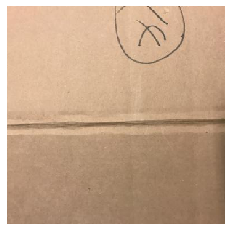

In [6]:
images = []
labels = []
trashnet_data_path = 'data/TrashNet'
trashnet_image_folders = os.listdir(trashnet_data_path)
cat_count = 200
flag = True
for folder in trashnet_image_folders:
    if "_" not in folder:
        count = 0
        print(f"Loading TrashNet folder {folder}...")
        for img in os.listdir(f"{trashnet_data_path}/{folder}"):
            if count < cat_count:
                # Load image
                I = preprocess_image(f"{trashnet_data_path}/{folder}/{img}")

                # Show image
                if flag:
                    fig,ax = plt.subplots(1)
                    plt.axis('off')
                    plt.imshow(I)
                    flag = False

                if I.shape == (300, 300, 3):
                    print(f"About to add folder={folder} - Type={type(folder)}")
                    images.append(I)
                    if folder == 'cardboard':
                        labels.append(1)
                    elif folder == 'glass':
                        labels.append(2)
                    elif folder == 'metal':
                        labels.append(3)
                    elif folder == 'paper':
                        labels.append(4)
                    elif folder == 'plastic':
                        labels.append(5)
                    elif folder == 'trash':
                        labels.append(6)
                    count = count + 1
                else:
                    print(f"Not adding {img} due to improper shape...")

trashnet_img_count = len(images)
print(f"TrashNet Image Count: {trashnet_img_count}")

pos_label_count = trashnet_img_count
print(f"Label count: {pos_label_count}")

Random Image Count: 1200
Not adding 000000007888.jpg due to improper shape...


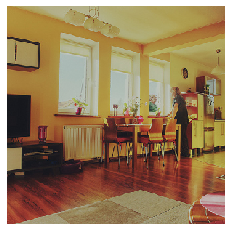

In [7]:
random_data_path = 'val2017'
random_image_files = os.listdir(random_data_path)[:trashnet_img_count]
random_img_count = len(random_image_files)
print(f"Random Image Count: {random_img_count}")
            
flag = True    
for i, img in enumerate(random_image_files):
    if count > 0:
        # Load image
        I = preprocess_image(random_data_path + '/' + img)

        # Show image
        if flag:
            flag = False
            fig,ax = plt.subplots(1)
            plt.axis('off')
            plt.imshow(I)

        if I.shape == (300, 300, 3):
            images.append(I)
            labels.append(0)
            count = count - 1
        else:
            print(f"Not adding {img} due to improper shape...")

In [8]:
# Split data
print(f"Image total: {len(images)}")
print(f"Label total: {len(labels)}")
print(labels[:10])
print(set(labels))

train_x, val_x, train_y, val_y = train_test_split(np.array(images), np.array(labels), test_size=0.20, random_state=7)

Image total: 1400
Label total: 1400
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
{0, 1, 2, 3, 4, 5, 6}


In [12]:
# Create basic mobilenet binary classification model - TF 2.0 model layer
models = [#'https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4',
          #'https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4',
          #'https://tfhub.dev/google/imagenet/mobilenet_v1_100_128/feature_vector/4',
          'https://tfhub.dev/google/imagenet/resnet_v1_50/feature_vector/4']

epochs = 5
batch_size = 32
best_model = None
best_history = None
best_acc = 0.0
for model_arch in models:
    print(f"Building {model_arch}... epochs={epochs}, batch_size={batch_size}")
    model = tf.keras.Sequential([
        #arguments=dict(batch_norm_momentum=0.997)
        tf_hub.KerasLayer(model_arch, trainable=False),  
        tf.keras.layers.Dense(1, activation='softmax')
    ])
    model.build([None, 300, 300, 3])  
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='binary_crossentropy',  
                  metrics=['accuracy'])
    print("Fitting...")
    history = model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, validation_data=(val_x, val_y)) 
    
    val_acc = history.history['val_accuracy'][1]
    print(f"Val Acc: {val_acc}")

    if val_acc > best_acc:
        best_history = history
        best_model = model
        best_acc = val_acc

Building https://tfhub.dev/google/imagenet/resnet_v1_50/feature_vector/4... epochs=5, batch_size=32
Fitting...
Train on 1120 samples, validate on 280 samples
Epoch 1/5
1120/1120 [==============================] - 272s 243ms/sample - loss: -31.0431 - accuracy: 0.1437 - val_loss: -28.3200 - val_accuracy: 0.1393
Epoch 2/5
1120/1120 [==============================] - 257s 229ms/sample - loss: -31.0431 - accuracy: 0.1437 - val_loss: -28.3200 - val_accuracy: 0.1393
Epoch 3/5
1120/1120 [==============================] - 261s 233ms/sample - loss: -31.0431 - accuracy: 0.1437 - val_loss: -28.3200 - val_accuracy: 0.1393
Epoch 4/5
1120/1120 [==============================] - 268s 239ms/sample - loss: -31.0431 - accuracy: 0.1437 - val_loss: -28.3200 - val_accuracy: 0.1393
Epoch 5/5
1120/1120 [==============================] - 255s 228ms/sample - loss: -31.0431 - accuracy: 0.1437 - val_loss: -28.3200 - val_accuracy: 0.1393
Val Acc: 0.13928571343421936


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   multiple                  23561152  
_________________________________________________________________
dense_1 (Dense)              multiple                  2049      
Total params: 23,563,201
Trainable params: 2,049
Non-trainable params: 23,561,152
_________________________________________________________________


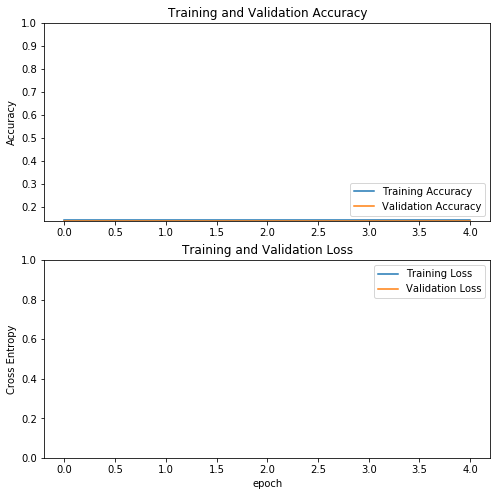

In [13]:
# Plot accuracy vs loss graphs
# Show model architecture
best_model.summary()

acc = best_history.history['accuracy']
val_acc = best_history.history['val_accuracy']

loss = best_history.history['loss']
val_loss = best_history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

array([[1.]], dtype=float32)

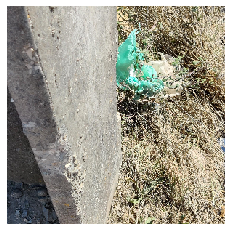

In [14]:
# example prediction
test_img = preprocess_image('../TACO/data/batch_10/000006.jpg')
fig,ax = plt.subplots(1)
plt.axis('off')
plt.imshow(test_img)

best_model.predict(np.array([test_img]),
    batch_size=None,
    verbose=0,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False)